# Coursera Python for DSs
__cheat sheet__

# WEEK 1: Regular Expressions

--------
__Miscellaneous__

Web resources: podcast python bytes, webpage planet python

__dictionaries, formattedStrings, date/time, lambda, map, list comprehension, numpy__

In [105]:
x = {'name': 'Peter', 'item_bought': 'TFT', 'item_price': 100, 'quantity': 3}
print(x)
print('\n')
strF = '{} bought {} {}, each prized {}$, and paid {}$ overall'

print(strF.format(x['name'], x['quantity'], x['item_bought'], x['item_price'],  x['item_price'] * x['quantity']))

{'name': 'Peter', 'item_bought': 'TFT', 'item_price': 100, 'quantity': 3}


Peter bought 3 TFT, each prized 100$, and paid 300$ overall


In [106]:
#read CSV
import pandas as pd
fn = r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/drinks.csv'
mpg = pd.read_csv(fn)
print(mpg.iloc[1])

# open uses a local file and would work like this:
# import csv
# %precision 2
# with open(fn) as csvfile:
#    mpg = list(csv.DictReader(csvfile))
# mpg[1]

# manually calculate mean beer & wine servings per continent would work like this:
# continentList = list(set(d['continent'] for d in mpg))
# print(continentList)

# beerList = []; wineList = []; countriesPerCont = []
#for t in continentList:
#    sumBeer = 0
#    sumWine = 0
#    counter = 0
#    for d in mpg:
#        if d['continent'] == t:
#            counter += 1
#            sumBeer += float(d['beer_servings'])
#            sumWine += float(d['wine_servings'])
    
#    countriesPerCont.append(counter)
#    beerList.append(sumBeer/counter)
#    wineList.append(sumWine/counter)
 
#fStr = 'Continent {}: # countries = {} mean beer = {} mean wine = {}'
#for d in range(0, len(continentList)):
#    print(fStr.format(continentList[d], countriesPerCont[d], beerList[d], wineList[d]))
# a = map(min, beerList, wineList)
# print(list(a))

country                         Albania
beer_servings                        89
spirit_servings                     132
wine_servings                        54
total_litres_of_pure_alcohol        4.9
continent                            EU
Name: 1, dtype: object


In [107]:
# Map function does one operation in an entire list (or multiple lists) - it is an implicit for loop

people = ['Dr. Christopher Brooks', 'Dr. Kevyn Collins-Thompson', 'Dr. VG Vinod Vydiswaran', 'Dr. Daniel Romero']

def split_title_and_name(person):
    a = person.split()
    return a[0] + a[-1] #Your answer here

# two ways to return only title and surname of people - loop vs map
for d in people:
    print(split_title_and_name(d))
    
list(map(split_title_and_name, people))


Dr.Brooks
Dr.Collins-Thompson
Dr.Vydiswaran
Dr.Romero


['Dr.Brooks', 'Dr.Collins-Thompson', 'Dr.Vydiswaran', 'Dr.Romero']

In [108]:
import datetime as dt
import time as tm
tm.time()

print(dt.datetime.fromtimestamp(tm.time())) 
dt.date.today() - dt.timedelta(days=666) # which day was 666 days ago?

2022-05-26 14:01:21.627026


datetime.date(2020, 7, 29)

In [109]:
#Lambda = pythons anonymous function - it is limited to a SINGLE expression
myFx = lambda a,b: a+b

myFx(1,7)

8

In [110]:
# list comprehension: A great way to squeeze a lot of loops into a single line of code
def times_tables():
    lst = []
    for i in range(3):
        for j in range (3):
            lst.append(i*j)
    return lst

print(times_tables())
print([j*i for i in range(3) for j in range(3)]) # same thing as a list comprehension


[0, 0, 0, 0, 1, 2, 0, 2, 4]
[0, 0, 0, 0, 1, 2, 0, 2, 4]


In [111]:
import numpy as np

a = np.array([[1,2], [5,6], [9,10]])
print(a)
print('\n')
print(a[[0,2],[0, 1]]) # similar to a zip: coordinates are [0,0] and [2,1]
print('\n')
#print(a[[0:2],[0:2]]) 
print(a[[0, 2], 0:2]) 


[[ 1  2]
 [ 5  6]
 [ 9 10]]


[ 1 10]


[[ 1  2]
 [ 9 10]]


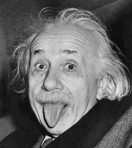

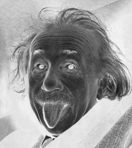

In [112]:
from PIL import Image
import requests
from io import BytesIO

response = requests.get(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/einstein.jpg')
im = Image.open(BytesIO(response.content))

im = im.resize((132, 148))
display(im)

imMask = np.full(np.shape(im), 255)
imInv = imMask - im
display(Image.fromarray(imInv.astype(np.uint8)))

----------
__Regular Expressions__

\* character is repeated 0 or more times == {0,}

\+ character is repeated 1 or more times == {1,}

\. any char except newline (\\n) ==   not sure  [\d\w]

\? preceding char is optional

\^ vs \$ anchor: match must be at string start vs end

\[...] vs [^...] matches vs mismatches a char in set

/d any digit

/w any alphanumeric (any lowercase or uppercase letter, underscore character, or any digit)

/s whitespace

In [113]:
import re

text = 'RegEx is far from trivial.'
print(re.search('trivial', text))

if re.search('trivial', text):
    print('EASY')
else: 
    print('NOT EASY')

# NOTE: not clear to me how/why the re.split() method differs from split(): both split a text based on a template
text = 'RegEx is far from trivial. RegEx is important. If RegEx were easier I could learn them in 5m.'
print('Standard split fx: ' + str(text.split('RegEx')))
print('re.split: ' + str(re.split('RegEx', text)))
re.split('RegEx', text)

print(len(re.findall('RegEx', text)))
print('number of regex in str: ' + str(len(re.findall('regex', text.lower())))) # try with lowercase

# lets count the number of vowels in text
a = re.findall('[aeiou]', text.lower())
print('number of vowels: ' + str(len(a))  + ' i.e., ' + str(a))

# lets count the number of consonants using a range of chars
a = len(re.findall('[a-z]', text.lower())) - len(re.findall('[aeiou]', text.lower()))
print('number of consonants: ' + str(a))

# lets count the number of non-characters
a = len(re.findall('[^a-z]', text.lower()))
print('number of non-letters (e.g., space, period, or digits): ' + str(a))

# lets count the number of vowels that are followed by another vowel - using a set operator
a = re.findall('[aeiou][aeoiu]', text.lower())
print('number of vowels followed by vowels: ' + str(len(a)) + ' i.e., ' + str(a))

# lets do something similar using a logical OR 
a = re.findall('ae|ea', text.lower())
print('number of a followed by e, or vice versa: ' + str(len(a)) + ' i.e., ' + str(a))


<re.Match object; span=(18, 25), match='trivial'>
EASY
Standard split fx: ['', ' is far from trivial. ', ' is important. If ', ' were easier I could learn them in 5m.']
re.split: ['', ' is far from trivial. ', ' is important. If ', ' were easier I could learn them in 5m.']
3
number of regex in str: 3
number of vowels: 30 i.e., ['e', 'e', 'i', 'a', 'o', 'i', 'i', 'a', 'e', 'e', 'i', 'i', 'o', 'a', 'i', 'e', 'e', 'e', 'e', 'e', 'a', 'i', 'e', 'i', 'o', 'u', 'e', 'a', 'e', 'i']
number of consonants: 42
number of non-letters (e.g., space, period, or digits): 21
number of vowels followed by vowels: 5 i.e., ['ia', 'ea', 'ie', 'ou', 'ea']
number of a followed by e, or vice versa: 2 i.e., ['ea', 'ea']


-----------
__QUANTIFIERS__

In [114]:
# quantifiers define how often a pattern needs to be matched: e{m,n} where e = expression, m = min # matches, n = max # matches
# IMPORTANT!!!!!! do not leave a space between m,n - correct = {m,n}, wrong = {m, n}!!!!!!!!! 
text = 'it is a wee bit annoying yeah'
a = re.findall('[en]{2,}', text.lower())
print('Repeated e or n: ' + str(a))

text = 'AABACCABBABCA'
a = re.findall('AB{2,}|BC{2,}', text)
print(a)

a = re.findall('[A|B]C{1,}', text) # drop in grades
print(a)

a = re.findall('A*B', text) # any times A (pot unlimited reps) followed by B
print(a)

# groups
a = re.findall('(A*)(B)', text) # all combinations with B that may be preceded by an A (or nothing, but not a C)
print(a)

# seem to be stored in a strange tupel/dict way ... GROUPS
for item in re.finditer('(A*)(B)', text):
    print(item.groups())

Repeated e or n: ['ee', 'nn']
['ABB']
['ACC', 'BC']
['AAB', 'AB', 'B', 'AB']
[('AA', 'B'), ('A', 'B'), ('', 'B'), ('A', 'B')]
('AA', 'B')
('A', 'B')
('', 'B')
('A', 'B')


------
__WIKI example__

In [115]:
# use regEx to 
#    a) list all categories (manually)
#    b) list all hyperlinks
#    c) list & display all JPEG pix
# 2 then compare a-c with O Scholz (using finditer) 

import wikipedia
wikipedia.set_lang("de")
print(wikipedia.search('Annalena Baerbock'))
page_object = wikipedia.page('Annalena Baerbock')
print(page_object.html) # printing html of page_object
print(page_object.url)              # print page url
print(page_object.images[0]) # get URLs of pix
#print('\n' + page_object.original_title + '\n')   # print page title
#print(page_object.categories)

text = page_object.content
img_urls = page_object.images

['Annalena Baerbock', 'Bundestagswahl 2021', 'Annalena', 'Robert Habeck', 'Nora Tschirner', 'Kanzlerkandidat', 'Initiative Neue Soziale Marktwirtschaft', 'Auswärtiges Amt', 'Jetzt. Wie wir unser Land erneuern', 'Mai 2022']
<bound method WikipediaPage.html of <WikipediaPage 'Annalena Baerbock'>>
https://de.wikipedia.org/wiki/Annalena_Baerbock
https://upload.wikimedia.org/wikipedia/commons/d/d6/2019-05-09_Annalena_Baerbock_GR%C3%9CNE_MdB_by_Olaf_Kosinsky_1777.jpg


In [116]:
#re.findall('[\w]{1,100}[ europa]',text.lower())
print(re.findall('[\w]{1,100} europa',text.lower())) # find word before "europa"
print(re.findall('[\w]* europa',text.lower())) # word can be any length

# let's only print the word before europa (without europa)
for europa in re.findall('[\w]* europa',text.lower()):
    print(re.split(' ', europa)[0])
    
# do a very similar thing, but now the word and europa|deutschland are put in different groups 
regEx = '([\w]*) (europa|deutschland)' # lets extend the search target to two possible items (OR)
print(re.findall(regEx, text.lower())) # note: the empty space is on purpose to indicate an empty space, the parentheses identify groups

regEx = '([\w]*) (europa|deutschland)'
for item in re.finditer(regEx, text.lower()):
    print(item.groups()) # without arguments this corresponds to index[0] = entire group
    
print('\n')
# lets repeat this trick but only print out the word before the search target
for item in re.finditer(regEx, text.lower()):
    print(item.group(1)) # that is the word we are interested in
    #print(item.group(2)) # that is the target 

print('\nUsing DICTIONARIES & Labels:')
# finally, we assign labels - they need to be included in the regEx, in fact they need to be in the parentheses of each group
regEx = '(?P<wordBefore>[\w]*) (?P<Target>europa|deutschland)'
for item in re.finditer(regEx, text.lower()):
    print(item.groupdict()['wordBefore']) # that is the word we are interested in

print(item.groupdict())

['der europa', 'bag europa', 'bundesarbeitsgemeinschaft europa', 'bag europa', 'der europa', 'in europa', 'des europa', 'in europa', 'nach europa', 'müsse europa', 'muss europa', 'überparteilichen europa']
['der europa', 'bag europa', 'bundesarbeitsgemeinschaft europa', 'bag europa', 'der europa', 'in europa', 'des europa', 'in europa', 'nach europa', 'müsse europa', 'muss europa', 'überparteilichen europa']
der
bag
bundesarbeitsgemeinschaft
bag
der
in
des
in
nach
müsse
muss
überparteilichen
[('der', 'europa'), ('bag', 'europa'), ('bundesarbeitsgemeinschaft', 'europa'), ('bag', 'europa'), ('der', 'europa'), ('in', 'europa'), ('des', 'europa'), ('regierungsamt', 'deutschland'), ('industriestandort', 'deutschland'), ('dem', 'deutschland'), ('in', 'deutschland'), ('in', 'europa'), ('in', 'deutschland'), ('nach', 'europa'), ('dass', 'deutschland'), ('müsse', 'europa'), ('aus', 'deutschland'), ('bundesrepublik', 'deutschland'), ('werde', 'deutschland'), ('muss', 'europa'), ('industriestando

-------
# Week 2: Series and DataFrames

__import from CSV__

In [117]:
print('SERIES ' + '='*100)
import pandas as pd
studs = pd.Series({'Alice': 90, 'Josh': 99, 'Craig': 70}) # approach 1: use dict
print(studs)

studs = pd.Series([90, 99, 70], index = ['Alice', 'Josh', 'Craig']) # approach 2: use list + separate index (optional)
print(studs)

# Accessing series:
print(studs.iloc[2]) # by location
print(studs[2]) # or
print(studs.loc['Craig']) # by value (index val)
print(studs['Craig']) # or

#append
print(studs.append(pd.Series([1,2,3], index = ['morg', 'morg', 'morg']))) # make sure that the appended object is a series or DF
# import CSV


SERIES ====================================================================================================
Alice    90
Josh     99
Craig    70
dtype: int64
Alice    90
Josh     99
Craig    70
dtype: int64
70
70
70
70
Alice    90
Josh     99
Craig    70
morg      1
morg      2
morg      3
dtype: int64


C:\Users\s01tk9\AppData\Local\Temp\ipykernel_6180\2153099867.py:16: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  print(studs.append(pd.Series([1,2,3], index = ['morg', 'morg', 'morg']))) # make sure that the appended object is a series or DF


-------
__Creating Dataframes__

In [118]:
print('DataFrames ' + '='*100)

# Approach1: cat separate Series, each with one case, that have been defined as dicts
r1 = pd.Series({'Name': 'Alice', 'Class': 'History', 'Grade': 89}) # note: the index here refers to the features
r2 = pd.Series({'Name': 'Josh', 'Class': 'Maths', 'Grade': 76}) # note: the index here refers to the features
r3 = pd.Series({'Name': 'Craig', 'Class': 'English', 'Grade': 71}) # note: the index here refers to the features
df = pd.DataFrame([r1,r2,r3], index = ['UCL', 'UoA', 'UoA']) # note that the index now refers to the cases/samples
print(df)

# Approach 2: use 1 dict with multiple entries
df = [{'Name': 'Alice', 'Class': 'History', 'Grade': 89},
      {'Name': 'Josh', 'Class': 'Maths', 'Grade': 76},
      {'Name': 'Craig', 'Class': 'English', 'Grade': 71}]
df = pd.DataFrame(df, index = ['UCL', 'UoA', 'UoA'])
print(df)

# Approach3: start from scratch - define  rowInds now and features later on
df = pd.DataFrame([['Alice', 'History', 89], ['Josh', 'Maths', 76], ['Craig', 'English', 71]], index = ['UCL', 'UoA', 'UoA'])
df.columns = ['Name', 'Class', 'Grade']
print(df)


DataFrames ====================================================================================================
      Name    Class  Grade
UCL  Alice  History     89
UoA   Josh    Maths     76
UoA  Craig  English     71
      Name    Class  Grade
UCL  Alice  History     89
UoA   Josh    Maths     76
UoA  Craig  English     71
      Name    Class  Grade
UCL  Alice  History     89
UoA   Josh    Maths     76
UoA  Craig  English     71


-------
__acessing data (iloc, loc), adding/dropping data__

In [119]:
print('ACCESSING DataFrames ' + '='*100)

print(df.iloc[0:2]) #by indexLoc
print(df.loc[['UCL', 'UoA']]) #by value (sample name)
print(df.iloc[0:2][['Name', 'Grade']]) #by indexLoc, but show a single feature (by val)
print(df.loc['UoA'][['Name', 'Grade']]) #by val, show two features (by val)
print(df.loc['UoA',['Name', 'Grade']]) # same output

print('Drop data -----')
print(df.drop('UoA')) # drop row(s) [axis=0, default]
print(df.drop('Name',axis=1))
print(df.drop('Name',inplace=True,axis=1)) #NOTE inplace is DESTRUCTIVE - it will change the original df!

print('Add a new COLUMN -----')
df['noOfBeast'] = 666
print(df)

ACCESSING DataFrames ====================================================================================================
      Name    Class  Grade
UCL  Alice  History     89
UoA   Josh    Maths     76
      Name    Class  Grade
UCL  Alice  History     89
UoA   Josh    Maths     76
UoA  Craig  English     71
      Name  Grade
UCL  Alice     89
UoA   Josh     76
      Name  Grade
UoA   Josh     76
UoA  Craig     71
      Name  Grade
UoA   Josh     76
UoA  Craig     71
Drop data -----
      Name    Class  Grade
UCL  Alice  History     89
       Class  Grade
UCL  History     89
UoA    Maths     76
UoA  English     71
None
Add a new COLUMN -----
       Class  Grade  noOfBeast
UCL  History     89        666
UoA    Maths     76        666
UoA  English     71        666


-------
__editing columns (rename feat labels)__

In [120]:
print('Reading DataFrames from CSVs ' + '='*100)
df = pd.read_csv(r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col=0) #index_col makes sense if there is an ID in the data
print(df[['Survived','Pclass','Sex', 'Age', 'SibSp']].head())

# modify column names
newDF = df.rename(columns = {'SibSp': 'nSiblings'})
print(newDF[['Survived','Pclass','Sex', 'Age', 'nSiblings']].head())

# clean column names - remove empty spaces
newDF.rename(mapper = str.split, axis = 'columns')

# manual approach to modify col names: remove spaces + make lowercase /// this worked in SPYDER
cols = list(newDF.columns)
cols = [c.lower().strip() for c in cols]
newDF.columns = cols
print(newDF[['survived','pclass','sex', 'age', 'nsiblings']].head())

print('put all columns to uppercase')
newDF = df.copy()
newDF = df.rename(mapper = lambda x: x.upper(), axis = 1)
print(newDF[['NAME', 'SEX', 'AGE']].head())


Reading DataFrames from CSVs ====================================================================================================
             Survived  Pclass     Sex   Age  SibSp
PassengerId                                       
1                   0       3    male  22.0      1
2                   1       1  female  38.0      1
3                   1       3  female  26.0      0
4                   1       1  female  35.0      1
5                   0       3    male  35.0      0
             Survived  Pclass     Sex   Age  nSiblings
PassengerId                                           
1                   0       3    male  22.0          1
2                   1       1  female  38.0          1
3                   1       3  female  26.0          0
4                   1       1  female  35.0          1
5                   0       3    male  35.0          0
             survived  pclass     sex   age  nsiblings
PassengerId                                           
1                 

---------
__Boolean indexing, index edits (set, reset, multi-indexing)__

In [121]:
print('Accessing content in DataFrames ' + '='*100)
showVars = ['Survived','Pclass','Sex', 'Age']

# using boolean mask and the where() method
mask = df['Pclass']<3
print(df[showVars].where(mask).head()) # here, all rows that do not meet the mask reqs are NaN'ed out
print(df[showVars].where(mask).dropna().head()) # to remove the NaNs

# simpler, with implicit boolean mask
print(df[showVars][df['Pclass']<3]) 

# use mask where 2 conditions are satisfied
print(df[showVars][(df['Pclass']<3) & (df['Survived'] == 1)].head())

# Changing the INDEX
dfC = df.copy()
dfC = dfC.set_index('Embarked')
print(dfC[showVars].head())
dfC = dfC.reset_index() 
print(dfC[showVars].head()) # note that the old index (PassengerID) has been lost

# MULTI-Indexing (neat, but not strictly necessary)
#dfC = dfC.set_index(['Embarked', 'SibSp'])
dfC = dfC.set_index(['Sex', 'Pclass'])
print(dfC[['Survived', 'Age']].head())

# retrieving a subset of cases with multi-inds: 
print(dfC[['Survived', 'Age']].loc['male', 3]) # male, in class 3

# comparing two different combinations
#a = dfC.loc[ [('male', 1), 
#              ('male', 2)] ]   # NOTE here the two conditions that define the two groups are passed as TUPEL, but can also done as lists (i.e., [])


Accessing content in DataFrames ====================================================================================================
             Survived  Pclass     Sex   Age
PassengerId                                
1                 NaN     NaN     NaN   NaN
2                 1.0     1.0  female  38.0
3                 NaN     NaN     NaN   NaN
4                 1.0     1.0  female  35.0
5                 NaN     NaN     NaN   NaN
             Survived  Pclass     Sex   Age
PassengerId                                
2                 1.0     1.0  female  38.0
4                 1.0     1.0  female  35.0
7                 0.0     1.0    male  54.0
10                1.0     2.0  female  14.0
12                1.0     1.0  female  58.0
             Survived  Pclass     Sex   Age
PassengerId                                
2                   1       1  female  38.0
4                   1       1  female  35.0
7                   0       1    male  54.0
10                  1       2  

C:\Users\s01tk9\AppData\Local\Temp\ipykernel_6180\3637873919.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(dfC[['Survived', 'Age']].loc['male', 3]) # male, in class 3


-----
__Missing Values (isnan, dropna, fillna)__ 

In [122]:
# FindNans via booleans 
# - df.isna(), df.isnull()
# - to remove Missing Values

print(df[['Cabin']].head())
"{} cases in dataFrame, but only {} valid (without NaNs)".format(len(df),len(df.dropna()))
print(df['Cabin'].fillna(666).head()) # use an arbitrary number - NOTE: fillna has an inplace = True option

print('FORWARD-fill =========')
print(df['Cabin'].fillna(method = 'ffill').head())
print('BACKWARD-fill =========')
print(df['Cabin'].fillna(method = 'bfill').head())

print('MANUAL-fill (requires knowing which scores to change) =========')
print(df['Cabin'].replace(1, 999).head()) # replace function // does not seem to work properly


            Cabin
PassengerId      
1             NaN
2             C85
3             NaN
4            C123
5             NaN
PassengerId
1     666
2     C85
3     666
4    C123
5     666
Name: Cabin, dtype: object
FORWARD-fill =========
PassengerId
1     NaN
2     C85
3     C85
4    C123
5    C123
Name: Cabin, dtype: object
BACKWARD-fill =========
PassengerId
1     C85
2     C85
3    C123
4    C123
5     E46
Name: Cabin, dtype: object
MANUAL-fill (requires knowing which scores to change) =========
PassengerId
1     NaN
2     C85
3     NaN
4    C123
5     NaN
Name: Cabin, dtype: object


------
__Manipulating DataFrames (replace with RegEx: replace, extract) - pt 1 Titanic__

In [123]:
print('Original Names col')
print(df['Name'].head())

print('RegEx -  replace Mrs and Mr =========')
newDF = df.copy()
print('REPLACE Mr with Married Man and Mrs with Married Woman')
newDF['Name'].replace(to_replace = r'.*Mr\..*', value = 'Married Man', regex = True, inplace=True)
newDF['Name'].replace(to_replace = r'.*Mrs\..*', value = 'Married Woman', regex = True, inplace=True)
print(newDF['Name'].head())

newDF = df.copy()
# shorten to First name
print('REPLACE anything after comma (,) with nil')
newDF['Surname'] = newDF['Name'].replace(to_replace = r'\,.*', value = '', regex = True)
print(newDF['Surname'].head())

# strip any strings in parentheses: starting with space+( and ending with )
newDF = df.copy()
print('REPLACE text in parentheses () and also nicknames in quotes (\"\") with nil')
newDF['Surname'] = newDF['Name'].replace(to_replace = r' \(([^)]*)\)', value='', regex=True)
newDF['Surname'] = newDF['Surname'].replace(to_replace = r' \"([^"]*)\"', value='', regex=True)
# legend: 
    # \(    = space + escape start par.
    # (     = start capture group
    # [^)]* = any element(s) that is NOT a closing par
    # )     = end capture group
    # \)    = stop parenthesis
# strip nicknames, printed in ""
print(newDF['Surname'])

print('\nParticularly elegant: \nEXTRACT first name (starts after period & space) and last name (very first string in col)')
newDF = df.copy()
newDF['First Name'] = newDF['Name'].str.extract(r'(?<=\. )([\w]*)')
# Positive LookBehind - legend:
    # (?<=\. )  = capture group that looks behind a period followed by space
    # ([\w]*)   = group with first name

newDF['Last Name'] = newDF['Name'].str.extract(r'(^[\w]*)')
    # first string in Name = surname
print(newDF[['First Name', 'Last Name']])
    
#newDF['Name'].str.extract('(^[\w]*)(?:.* )([\w]*$)').head()  # take first name and last name, ignore anything in-between /// only works if no extra entries

Original Names col
PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object
RegEx -  replace Mrs and Mr =========
REPLACE Mr with Married Man and Mrs with Married Woman
PassengerId
1               Married Man
2             Married Woman
3    Heikkinen, Miss. Laina
4             Married Woman
5               Married Man
Name: Name, dtype: object
REPLACE anything after comma (,) with nil
PassengerId
1       Braund
2      Cumings
3    Heikkinen
4     Futrelle
5        Allen
Name: Surname, dtype: object
REPLACE text in parentheses () and also nicknames in quotes ("") with nil
PassengerId
1              Braund, Mr. Owen Harris
2           Cumings, Mrs. John Bradley
3               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Hea

__Manipulating DataFrames - pt 2 Presidents__

In [124]:
import pandas as pd
df = pd.read_csv(r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/presidents.csv', index_col=0)
showVars = ['President', 'Born', 'Died']

print(df[showVars].head())
newDF = df.copy()
print('EXTRACT first name, middle name and last name')
newDF['First Name'] = newDF['President'].str.extract(r'(^[\w]*)')
newDF['Middle Names'] = newDF['President'].str.extract(r'(?<= )([A-Za-z \.]*)(?= )')
    # lookahead of 1st space, look behind 2nd (or Nth) space
newDF['Last Name'] = newDF['President'].str.extract(r'([\w]*$)')
newDF['Middle Names'] = newDF['Middle Names'].fillna('') #get rid of NaNs if no middle name
#showVars.extend(['First Name', 'Middle Names', 'Last Name'])
print(newDF[['President', 'First Name', 'Middle Names', 'Last Name']].head())

print('Convert dates into standard format using DATETIME')
from datetime import datetime
newDF['Born'] = newDF['Born'].replace(to_replace=r'\[a\]$', value='', regex=True) # remove comment
   
vals= []
for ind in range(0,len(newDF)):
   vals.append(str(datetime.strptime(newDF.iloc[ind]['Born'], '%b %d, %Y').date()))

newDF['Born'] = vals

vals= []
for ind in range(0,len(newDF)):
   if newDF.iloc[ind]['Died'] == '(living)':
        vals.append('(living)')  
   else:          
       vals.append(str(datetime.strptime(newDF.iloc[ind]['Died'], '%b %d, %Y').date()))

newDF['Died'] = vals
print(newDF[['Born', 'Died']].head())

print('NOTE: Pandas provides an easier way to get standard dates =======')
newDF=df.copy()
newDF['Born'] = newDF['Born'].replace(to_replace=r'\[a\]$', value='', regex=True) # remove comment
newDF['Born'] = pd.to_datetime(newDF['Born'])
#newDF['Died'] = pd.to_datetime(newDF['Died'])
print(newDF[['Born', 'Died']].head())


           President             Born          Died
#                                                  
1  George Washington  Feb 22, 1732[a]  Dec 14, 1799
2         John Adams  Oct 30, 1735[a]   Jul 4, 1826
3   Thomas Jefferson  Apr 13, 1743[a]   Jul 4, 1826
4      James Madison  Mar 16, 1751[a]  Jun 28, 1836
5       James Monroe     Apr 28, 1758   Jul 4, 1831
EXTRACT first name, middle name and last name
           President First Name Middle Names   Last Name
#                                                       
1  George Washington     George               Washington
2         John Adams       John                    Adams
3   Thomas Jefferson     Thomas                Jefferson
4      James Madison      James                  Madison
5       James Monroe      James                   Monroe
Convert dates into standard format using DATETIME
         Born        Died
#                        
1  1732-02-22  1799-12-14
2  1735-10-30  1826-07-04
3  1743-04-13  1826-07-04
4  1751-03-

-------
# WEEK 3: Advanced DataFrames

__merging dataframes__

In [125]:
print('Concatenating dataframes is simple: the entries in the new set are just added as new cases (rows).')
import pandas as pd
#s1 = pd.Series(['Old Campus', 'Forr Hill', 'Old Campus'], index = ['Jill', 'James', 'Craig'])
s1 = pd.Series(['Jim', 'History', 18], index = ['Name', 'Course', 'Grade'])
s2 = pd.Series(['James', 'Psychology', 14], index = ['Name', 'Course', 'Grade'])
df1 = pd.DataFrame([s1,s2], columns = ['Name', 'Course', 'Grade']) # note that the index now refers to the cases/samples
df1 = df1.set_index('Name')

s1 = pd.Series(['James', 27, 'male'], index = ['Name', 'Age', 'Gender'])
s2 = pd.Series(['Jill', 23, 'female'], index = ['Name', 'Age', 'Gender'])
df2 = pd.DataFrame([s1,s2], columns = ['Name', 'Age', 'Gender']) # note that the index now refers to the cases/samples
df2 = df2.set_index('Name')

print(df1)
print(df2)

print('This may create confusion if some entries are redundant (ie same index appears multiple times) but the keys are different (ie different vars).')
print('One way to deal with this is to add keys indicating where the data comes from')
print(pd.concat([df1, df2], keys=['Set A', 'Set B'])) # the keys indicate whether the data comes from Set1 or 2

Concatenating dataframes is simple: the entries in the new set are just added as new cases (rows).
           Course  Grade
Name                    
Jim       History     18
James  Psychology     14
       Age  Gender
Name              
James   27    male
Jill    23  female
This may create confusion if some entries are redundant (ie same index appears multiple times) but the keys are different (ie different vars).
One way to deal with this is to add keys indicating where the data comes from
                 Course  Grade   Age  Gender
      Name                                  
Set A Jim       History   18.0   NaN     NaN
      James  Psychology   14.0   NaN     NaN
Set B James         NaN    NaN  27.0    male
      Jill          NaN    NaN  23.0  female


----------------------------------------------
Typically, what we wanna do when joining sets is to INTEGRATE the data (ie keep cases, add features). Depending on how the data is joined, this results in cases being dropped (if not common to both sets) or that missing values will be inserted (for cases that exist only in one set). Logic of operators that join data sets:

__Given:__ \
A: 1, 2, 3, 4\
B: 3, 4, 5, 6

__inner join:__ only keys that are in both sets (INTERSECT)\
A: 3, 4\
B: 3, 4
<div> 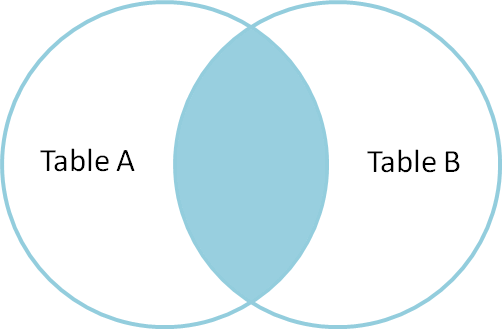</div>

__left outer:__ all keys in L-set, those that intersect for R-set \
A: 1, 2, 3, 4\
B: Nan, Nan, 3, 4
<div> 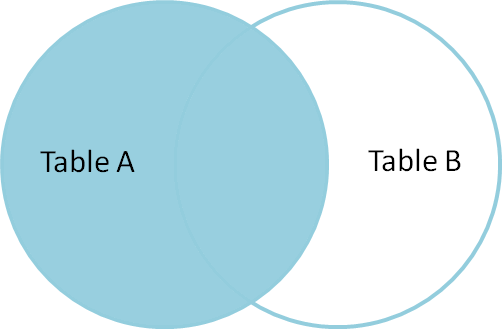</div>

__right outer:__ all keys in R-set, those that intersect for L-set \
A: 3, 4, Nan, Nan\
B: 3, 4, 5, 6

__full outer:__ all keys in both sets (UNION) \
A: 1, 2, 3, 4, Nan, Nan\
B: Nan, Nan, 3, 4, 5, 6
<div> 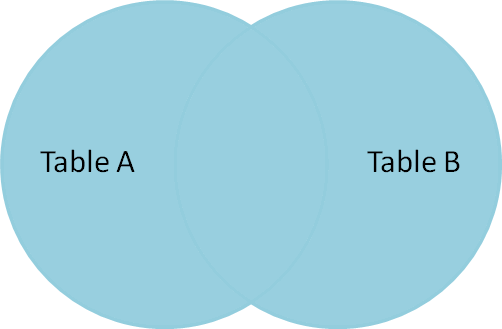</div>


In [126]:
print('The KEY that is used to join the sets is crucial - here: NAME (in Set A = Jim, James, Set B = James, Jill')#. \nThe names contained in Set A = Jim, James; Set B = James, Jill')
print('\nINNER is the default method (corresponds to INTERSECT). Non-matching cases are eliminated (here: Jim & Jill)')
# inner = interect: eliminates cases that do not match (or marks them w nan)
print(pd.merge(df1, df2,on='Name'))
print('The same result is obtained by extending one set by another: df1.merge(df2, on = \'Name\')')


print('\nLEFT OUTER = keep all elements in A (Jim, James) + intersect A&B')
print(df1.merge(df2, how='left', on='Name')) 
print('\nRIGHT OUTER = keep all elements in B (James, Jill) + intersect A&B')
print(df1.merge(df2, how='right', on='Name'))
print('\nFULL OUTER = Addition A + B')
print(df1.merge(df2, how='outer', on='Name')) 
print('Final NOTE: there are also ways to get set differences (eg, A but not B) ...')

print('Note that you can also use multiple keys to match on')
df1['Surname'] = ['Reilly', 'Mackie'] # add column
df1 = df1.reset_index()    # numeric index
print(df1)
print('\n')

df2.loc['Jim'] = [19, 'male'] # add record
df2['Surname'] = ['Mackie', 'Reilly', 'Burton'] # add column
df2 = df2.reset_index()
print(df2)
print('\nNote that only the exact match on both keys is retained.\n')
print(df1.merge(df2, on=['Name', 'Surname'])) 

The KEY that is used to join the sets is crucial - here: NAME (in Set A = Jim, James, Set B = James, Jill

INNER is the default method (corresponds to INTERSECT). Non-matching cases are eliminated (here: Jim & Jill)
           Course  Grade  Age Gender
Name                                
James  Psychology     14   27   male
The same result is obtained by extending one set by another: df1.merge(df2, on = 'Name')

LEFT OUTER = keep all elements in A (Jim, James) + intersect A&B
           Course  Grade   Age Gender
Name                                 
Jim       History     18   NaN    NaN
James  Psychology     14  27.0   male

RIGHT OUTER = keep all elements in B (James, Jill) + intersect A&B
           Course  Grade  Age  Gender
Name                                 
James  Psychology   14.0   27    male
Jill          NaN    NaN   23  female

FULL OUTER = Addition A + B
           Course  Grade   Age  Gender
Name                                  
Jim       History   18.0   NaN     NaN


--------
__idioms - pandorable style: Chaining & apply(map)__

In [127]:
print('CHAINING: can improve readability')
pd.options.mode.chained_assignment = None  # default='warn'
df = df1.merge(df2, how='outer', on=['Name', 'Surname'])
df['Course'][2]='Maths'; 
df['Grade'][2]=20; 
print(df)

(
df.where(df['Age']>20)
    .dropna()
    .rename(columns = {'Name': 'First Name'})
    .set_index(['First Name', 'Surname'])
)

CHAINING: can improve readability
    Name      Course  Grade Surname   Age  Gender
0    Jim     History   18.0  Reilly   NaN     NaN
1  James  Psychology   14.0  Mackie  27.0    male
2   Jill       Maths   20.0  Reilly  23.0  female
3    Jim         NaN    NaN  Burton  19.0    male


,,Course,Grade,Age,Gender
First Name,Surname,,,,
James,Mackie,Psychology,14.0,27.0,male
Jill,Reilly,Maths,20.0,23.0,female


In [128]:
print('APPLY: transform data in columns')
df = df1.merge(df2, how='outer', on=['Name', 'Surname'])
df['Age'][0]=22
print(df)
print('\nMultiply age with 2')
print(df.apply(lambda x: x['Age']*2, axis=1)) # note that it is crucial to state axis = 1 (seems counterintuitive, as lambda is applied across rows)

print('\nWhile lambda is a short anonymous function, this also works with CUSTOMIZED Fx that are passed to apply().\nHere we recode gender to a numeric val.\n')
def rec_Gender(x):
    if x['Gender'] == 'male':
        x['Gender'] = 1
    elif x['Gender'] == 'female':
        x['Gender'] = 2
    
    return x

print(df.apply(rec_Gender, axis=1))

print('\nFor a fake dataset with entries for 2010-14, calculate mean per row for a certain time range')
import numpy as np
dfX = pd.DataFrame(np.random.rand(5,4), columns = range(2010,2014))

def calcMean(x):
    return np.mean(x)

print(dfX)
dfX['ave11_13'] = dfX[[2011, 2012, 2013]].apply(calcMean, axis=1)
print(dfX)
# dfX['ave11_13'] = dfX[[2011, 2012, 2013]].apply(lambda x: np.mean(x), axis=1) # LAMBDA Version of this ...

APPLY: transform data in columns
    Name      Course  Grade Surname   Age  Gender
0    Jim     History   18.0  Reilly  22.0     NaN
1  James  Psychology   14.0  Mackie  27.0    male
2   Jill         NaN    NaN  Reilly  23.0  female
3    Jim         NaN    NaN  Burton  19.0    male

Multiply age with 2
0    44.0
1    54.0
2    46.0
3    38.0
dtype: float64

While lambda is a short anonymous function, this also works with CUSTOMIZED Fx that are passed to apply().
Here we recode gender to a numeric val.

    Name      Course  Grade Surname   Age  Gender
0    Jim     History   18.0  Reilly  22.0     NaN
1  James  Psychology   14.0  Mackie  27.0     1.0
2   Jill         NaN    NaN  Reilly  23.0     2.0
3    Jim         NaN    NaN  Burton  19.0     1.0

For a fake dataset with entries for 2010-14, calculate mean per row for a certain time range
       2010      2011      2012      2013
0  0.892641  0.283672  0.333970  0.895351
1  0.893443  0.102141  0.021085  0.726404
2  0.250281  0.867908 

---------
__Split, apply, combine (groupby, aggregate, transform, filter)__ \
'Groupby selects data from a DF based on certain keys, applies transformations and returns the processed data in a new DF. This allows for calculating group statistics (.agg), transform the group data or to discard data using filters 

In [129]:
print('Groupby allows for selecting data and putting it into a DataFrameGroupBy object')
print('Good tutorial on grouping-related FX: https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm')
df = pd.DataFrame([['Jim', 'Reilly', 'male', 'Maths', 15], 
['James', 'Sutton', 'male', 'Psychology', 14],
['Jill', 'Osmond', 'female', 'Maths', 17],
['James', 'Reilly', 'male', 'Psychology', 16],
['Jane', 'Doe', 'female', 'Psychology', 21],
['Jen', 'Sutton', 'female', 'Psychology', 19]],
columns = ['Name', 'Surname', 'Gender', 'Course', 'Grade'])
print(df)

print('\nUse groups to show groups & members (indices), eg after grouping by COURSE')
a = df.groupby('Course')
print(a.groups)
print('Use .get_group() to select one group, eg Maths')
print(a.get_group('Maths'))

print('\nITERATING through all groups')
for group, frame in df.groupby('Course'):
    avg = np.average(frame['Grade'])
    print(str(len(frame)) + ' cases in group ' + group + ', mean score: '  + str(avg))

print('\nUsing a multi-index')
df = df.set_index(['Course', 'Gender'])
print(df)
for group, frame in df.groupby(level=(0,1)):
    avg = np.average(frame['Grade'])
    print(str(len(frame)) + ' cases in group ' + str(group) + ', mean score: '  + str(avg))

print('\nGroupby can use the output of CUSTOMIZED FX (example: compare ppl with surnames, 1st vs 2nd half in alphabet)')    
def groupFX(item):
    if item[0]<='M':
        return 1
    elif item[0]>'M':
        return 2
    
a = df.groupby(df['Surname'].apply(groupFX))
print(a.mean())
print('Cases per group: ' + str([len(a.groups[1]), len(a.groups[2])]))

for group, frame in df.groupby(df['Surname'].apply(groupFX)):
    print('Group ind ' + str(group))
    print(frame)

Groupby allows for selecting data and putting it into a DataFrameGroupBy object
Good tutorial on grouping-related FX: https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm
    Name Surname  Gender      Course  Grade
0    Jim  Reilly    male       Maths     15
1  James  Sutton    male  Psychology     14
2   Jill  Osmond  female       Maths     17
3  James  Reilly    male  Psychology     16
4   Jane     Doe  female  Psychology     21
5    Jen  Sutton  female  Psychology     19

Use groups to show groups & members (indices), eg after grouping by COURSE
{'Maths': [0, 2], 'Psychology': [1, 3, 4, 5]}
Use .get_group() to select one group, eg Maths
   Name Surname  Gender Course  Grade
0   Jim  Reilly    male  Maths     15
2  Jill  Osmond  female  Maths     17

ITERATING through all groups
2 cases in group Maths, mean score: 16.0
4 cases in group Psychology, mean score: 17.5

Using a multi-index
                    Name Surname  Grade
Course     Gender                      
Ma

In [130]:
import numpy as np
print('AGGREGATES (.agg) yields group summaries (NOTE: this has been done above manually). \nMultiple group statistics can be queried simultaneously (e.g group means, std and sample sizes) if lists are used')
a = df.groupby('Course')
#print(a.agg(np.mean)) 
print(a.agg([np.mean, np.std, np.size])) 
print('TRANSFORM modifies ALL values within a group, separately for each group. Returns the same number of elements as in the input DF (ie transformation of all elements')
df['Group Ave GENDER'] = df.groupby('Gender')['Grade'].transform(np.mean)
df['Group Ave COURSE'] = df.groupby('Course')['Grade'].transform(np.mean)
print(df)

print('\nAPPLY is often used as it allows for modifying the elements in a group separately per group (NOTE: apply can also be used as a FILTER)')
#df['zscore_rel2Group'] = df.groupby('Gender')['Grade'].apply(lambda x: (x - np.mean(x))/np.std(x))
print(df.groupby('Course')['Grade'].apply(lambda x: (x - np.mean(x))/np.std(x)))

AGGREGATES (.agg) yields group summaries (NOTE: this has been done above manually). 
Multiple group statistics can be queried simultaneously (e.g group means, std and sample sizes) if lists are used
           Grade               
            mean       std size
Course                         
Maths       16.0  1.414214    2
Psychology  17.5  3.109126    4
TRANSFORM modifies ALL values within a group, separately for each group. Returns the same number of elements as in the input DF (ie transformation of all elements
                    Name Surname  Grade  Group Ave GENDER  Group Ave COURSE
Course     Gender                                                          
Maths      male      Jim  Reilly     15              15.0              16.0
Psychology male    James  Sutton     14              15.0              17.5
Maths      female   Jill  Osmond     17              19.0              16.0
Psychology male    James  Reilly     16              15.0              17.5
           female   Ja

C:\Users\s01tk9\AppData\Local\Temp\ipykernel_6180\2987355682.py:5: FutureWarning: ['Name', 'Surname'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(a.agg([np.mean, np.std, np.size]))


---------
__Scales: working with categorical & ordinal data (astype)__

In [131]:
print('Pandas allows for treating data as a particular category')
grad = pd.DataFrame(['A+', 'D-', 'D+', 'A', 'A-', 'D'])
print('Some school grades in random order:')
print(grad)
print('Ordered - but not correctly: A comes before A+')
#print(grad.astype('category'))

myCat = pd.CategoricalDtype(['A+', 'A', 'A-', 'D+', 'D', 'D-'], ordered=True)
orderedCat = grad.astype(myCat)
print(orderedCat)

print('Ordered cats are ordinal (not nominal) - it is possible to check which grades are better than D (ie <)')
print(orderedCat[orderedCat < 'D'].dropna())
orderedCat['WorseThanAminus'] = orderedCat > 'A-'
print(orderedCat)

Pandas allows for treating data as a particular category
Some school grades in random order:
    0
0  A+
1  D-
2  D+
3   A
4  A-
5   D
Ordered - but not correctly: A comes before A+
    0
0  A+
1  D-
2  D+
3   A
4  A-
5   D
Ordered cats are ordinal (not nominal) - it is possible to check which grades are better than D (ie <)
    0
0  A+
2  D+
3   A
4  A-
    0  WorseThanAminus
0  A+            False
1  D-             True
2  D+             True
3   A            False
4  A-            False
5   D             True


In [132]:
print('Data can be grouped into bins using pd.cut()')
a = pd.Series(np.random.rand(6))
b = pd.cut(a,10)
print(pd.DataFrame([a.T,b.T], index = ['Score', 'Bin']).T)

Data can be grouped into bins using pd.cut()
      Score             Bin
0  0.627264  (0.569, 0.627]
1  0.044563  (0.044, 0.103]
2  0.417116  (0.394, 0.452]
3  0.449473  (0.394, 0.452]
4  0.047267  (0.044, 0.103]
5   0.47477  (0.452, 0.511]


In [133]:
print('Dummy variables')

df = pd.DataFrame([['Jim', 'Reilly', 'male', 'Maths', 18], 
['James', 'Sutton', 'male', 'Psychology', 14],
['Jill', 'Osmond', 'female', 'Maths', 17],
['James', 'Reilly', 'male', 'Psychology', 16],
['Jane', 'Doe', 'female', 'Psychology', 21]],
columns = ['Name', 'Surname', 'Gender', 'Course', 'Grade'])

print(df); print(''); 
print('Dummies for nominal vars (Gender, Course) with drop first option.\n')
print(pd.get_dummies(df, columns=['Gender', 'Course'], drop_first=True))

Dummy variables
    Name Surname  Gender      Course  Grade
0    Jim  Reilly    male       Maths     18
1  James  Sutton    male  Psychology     14
2   Jill  Osmond  female       Maths     17
3  James  Reilly    male  Psychology     16
4   Jane     Doe  female  Psychology     21

Dummies for nominal vars (Gender, Course) with drop first option.

    Name Surname  Grade  Gender_male  Course_Psychology
0    Jim  Reilly     18            1                  0
1  James  Sutton     14            1                  1
2   Jill  Osmond     17            0                  0
3  James  Reilly     16            1                  1
4   Jane     Doe     21            0                  1


-------------------------
__Pivot Tables = Group/Sample Statistics__


In [134]:
print('Pivot tables provide a sample statistic by summarizing the data')
fn = r'https://raw.github.com/tkatus/coursera_lecture_notes/main/lectures_datasets/cwurData.csv'
df = pd.read_csv(fn)
print(df.head())

def getTiers(x): 
    if (x >= 1) & (x < 101):
        return 'First'
    elif (x >= 101) & (x < 201):
        return 'Second'
    elif (x >= 201) & (x < 301):
        return 'Third'
    else:
        return 'Other'

df['Tiers'] = df['world_rank'].apply(getTiers)
df = df.set_index('country')

print('\nCustom function (apply) categorized institutions in 4 tiers based on world_rank')
selCols = ['institution', 'world_rank', 'Tiers', 'score']    
df['Tiers'] = df['world_rank'].apply(getTiers)
df = df.sort_values('Tiers')
print(df[selCols])
piv = df.pivot_table(values = 'score', columns = 'Tiers', index = df.index, aggfunc = [np.mean])
print('PIVOT TABLE: Summary statistic for variable X (here, academic score)')
print(piv.head())

df = df.reset_index()
piv = df.pivot_table(values = 'score', columns = 'Tiers', index = 'country', aggfunc = [np.size, np.mean, np.std], margins=True)
print('\nPIVOT TABLE: with 3 measures (sample size, mean, std) and MARGINS')
print(piv.head())

print('\nPivot tables are multi-index DFs. It is possible to get any combination of columns, eg mean & first tier')
print(piv['mean']['First'].head())
print('Get the entry with the max score using idxmax:')
print(piv['mean']['First'].idxmax())
print('\nUse STACK to move the lowest (=last) column to innermost position to improve readability')
print(piv.stack().head())
print('NOTE: Unstack can also be used, up to the point where there is only a single column left')

Pivot tables provide a sample statistic by summarizing the data
   world_rank                            institution         country  \
0           1                     Harvard University             USA   
1           2  Massachusetts Institute of Technology             USA   
2           3                    Stanford University             USA   
3           4                University of Cambridge  United Kingdom   
4           5     California Institute of Technology             USA   

   national_rank  quality_of_education  alumni_employment  quality_of_faculty  \
0              1                     7                  9                   1   
1              2                     9                 17                   3   
2              3                    17                 11                   5   
3              1                    10                 24                   4   
4              4                     2                 29                   7   

   publications 

---------
__Date/Time Fx (timestamp, period)__

In [135]:
print('TimeStamp from string')
print(pd.Timestamp('2019-11-12'))
print('TimeStamp from numeric vals')
a = pd.Timestamp(2019, 11, 12, 13, 15)
print(a)
print('Read out info (Y, M, W, D, ... sec): Day ' + str(a.isoweekday()) + ' in week ' + str(a.week) + ', minute ' + str(a.minute))


TimeStamp from string
2019-11-12 00:00:00
TimeStamp from numeric vals
2019-11-12 13:15:00
Read out info (Y, M, W, D, ... sec): Day 2 in week 46, minute 15


In [136]:
print('Period defines a variable interval (eg year, month, week etc)')
print(pd.Period('2020'))
print(pd.Period('12/2020'))
print(pd.Period('27/12/2020'))

Period defines a variable interval (eg year, month, week etc)
2020
2020-12
2020-12-27


C:\Users\s01tk9\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: UserWarning: Parsing '27/12/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [137]:
print('Using timestamps in a series (note: enter dates as STRINGS!)')
a = pd.Series(['a','b'], [pd.Timestamp('2019-11-12'), pd.Timestamp('2019-11-13')])
print(a)
print('The timestamp here is the index)')
print(a.index)

print('Using timestamps in a DF')
print(pd.DataFrame([['a', pd.Timestamp('2019-11-12')], ['b', pd.Timestamp('2019-11-13')]], columns=['event', 'timestamp']))
print('Using periods works exactly the same')
a = pd.DataFrame([['a', pd.Period('2019-11-12')], ['b', pd.Period('2019-11-13')]], columns=['event', 'timestamp'])
print(a)
print('Time can be used as index')
print(a.set_index('timestamp'))

Using timestamps in a series (note: enter dates as STRINGS!)
2019-11-12    a
2019-11-13    b
dtype: object
The timestamp here is the index)
DatetimeIndex(['2019-11-12', '2019-11-13'], dtype='datetime64[ns]', freq=None)
Using timestamps in a DF
  event  timestamp
0     a 2019-11-12
1     b 2019-11-13
Using periods works exactly the same
  event   timestamp
0     a  2019-11-12
1     b  2019-11-13
Time can be used as index
           event
timestamp       
2019-11-12     a
2019-11-13     b


In [138]:
print('This DF has a variety of timestamp formats')
a = pd.DataFrame([[1,2],[3,4],[5,6]],index=['Aug-1989', '15-09-1755', '9/11/2001'],columns=['a', 'b'])
print(a)
print('It is straightforward to convert dates to standard format')
a.index = pd.to_datetime(a.index) 
print(a)

print('Switching between US and European formats (day before month?)')
print(pd.to_datetime(['11/09/2001'], dayfirst=False))
print(pd.to_datetime(['11/09/2001'], dayfirst=True))

This DF has a variety of timestamp formats
            a  b
Aug-1989    1  2
15-09-1755  3  4
9/11/2001   5  6
It is straightforward to convert dates to standard format
            a  b
1989-08-01  1  2
1755-09-15  3  4
2001-09-11  5  6
Switching between US and European formats (day before month?)
DatetimeIndex(['2001-11-09'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2001-09-11'], dtype='datetime64[ns]', freq=None)


C:\Users\s01tk9\AppData\Local\Temp\ipykernel_6180\1609052110.py:5: UserWarning: Parsing '15-09-1755' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  a.index = pd.to_datetime(a.index)


In [139]:
print('timedelta allows for measuring time since a particular timepoint')
print(pd.Timestamp('23.10.2021') - pd.Timestamp('23.04.1991'))
print('it can be used to add a delta to a date')
print(pd.Timestamp('23.10.2021') + pd.Timedelta('3D 28h 12s'))
print('offset is used to add standard calendar intervals, eg a week')
print(pd.Timestamp('23.10.2021') + pd.offsets.Week())
print('Or until the months end')
print(pd.Timestamp('23.10.2021') + pd.offsets.MonthEnd())

print('If you have to pay Netflix on a quarterly basis, here are the running costs')
import numpy as np
a = pd.date_range('Aug-2020', periods=8, freq='QS-AUG')
b = np.tile(9.5, (8, 1))
c = pd.DataFrame(b,columns=['amount'], index=a)
c['cumAmount']=c['amount'].cumsum()
print(c)
print('What if there is a cost raise after JUL-2021? The TRICK is to first get the mask, then do the assignment (NOT in one step)')
mask = c.index > pd.Timestamp('JUL-2021') # if the date were no index, you'd simply could use the column ID, eg c['date']  
c['amount'][mask] +=1
c['cumAmount']=c['amount'].cumsum()
print(c)

print('Resampling allows for grouping dates that fall into one period, e.g. per end of calendar year')
print(c.resample('Y').sum())
print('To select time data per date, it is possible to just state the year')
print(c.loc['2021'])
print(' ... and it is also possible to slice this way, eg for selecting dates past SEPT 2021')
print(c.loc['SEP-2021':]) # works also with '2021-09'

timedelta allows for measuring time since a particular timepoint
11141 days 00:00:00
it can be used to add a delta to a date
2021-10-27 04:00:12
offset is used to add standard calendar intervals, eg a week
2021-10-30 00:00:00
Or until the months end
2021-10-31 00:00:00
If you have to pay Netflix on a quarterly basis, here are the running costs
            amount  cumAmount
2020-08-01     9.5        9.5
2020-11-01     9.5       19.0
2021-02-01     9.5       28.5
2021-05-01     9.5       38.0
2021-08-01     9.5       47.5
2021-11-01     9.5       57.0
2022-02-01     9.5       66.5
2022-05-01     9.5       76.0
What if there is a cost raise after JUL-2021? The TRICK is to first get the mask, then do the assignment (NOT in one step)
            amount  cumAmount
2020-08-01     9.5        9.5
2020-11-01     9.5       19.0
2021-02-01     9.5       28.5
2021-05-01     9.5       38.0
2021-08-01    10.5       48.5
2021-11-01    10.5       59.0
2022-02-01    10.5       69.5
2022-05-01    10.5   

C:\Users\s01tk9\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: UserWarning: Parsing '23.10.2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\s01tk9\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: UserWarning: Parsing '23.04.1991' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
